# ABS Inflation multi-measure

## Python set-up

In [1]:
# system imports
from io import StringIO
from typing import cast

# analytic imports
import pandas as pd
import sdmxabs as sa
import mgplot as mg

In [2]:
# save charts in this notebook
CHART_DIR = "./CHARTS/Inflation-sdmx/"
mg.set_chart_dir(CHART_DIR)
mg.clear_chart_dir()

# display charts in this notebook
SHOW = True

## Exploratory data analysis

### Data flows

In [3]:
# search data flows for the National Accounts data
dflows = sa.data_flows()  # returns more than 1200 rows, each a data flow.
df = pd.DataFrame(dflows).T
df[df.name.str.contains("National Accounts")].sort_values("name")

,agencyID,version,isFinal,name
ANA_EXP,ABS,1.0.0,true,Australian National Accounts - Expenditure on ...
ANA_SFD,ABS,1.0.0,true,Australian National Accounts - State Final Demand
ANA_AGG,ABS,1.0.0,true,Australian National Accounts Key Aggregates
ANA_INC,ABS,1.0.0,true,Australian National Accounts – Income from Gro...
ANA_IND_GVA,ABS,1.0.0,true,Australian National Accounts – Production of G...


In [4]:
# And lets look for data flows that are a price index
df[df.name.str.contains("Price Index")].sort_values("name").head(10)

,agencyID,version,isFinal,name
CPI,ABS,1.1.0,true,Consumer Price Index (CPI) 17th Series
CPI_WEIGHTS,ABS,1.0.0,true,Consumer Price Index (CPI) Weights
ITPI_EXP,ABS,1.0.0,true,Export Price Index
ITPI_IMP,ABS,1.0.0,true,Import Price Index
CPI_M,ABS,1.2.0,true,Monthly Consumer Price Index (CPI) indicator
PPI,ABS,1.1.3,true,Producer Price Indexes by Industry
PPI_FD,ABS,1.1.0,true,"Producer Price Indexes, Final Demand"
RPPI,ABS,1.0.0,true,Residential Property Price Index
WPI,ABS,1.2.0,true,Wage Price Index


### Data dimensions

In [5]:
# check out the data dimensions for the Expenditure GDP data
pd.DataFrame(sa.data_dimensions("ANA_EXP")).T

,position,id,version,agencyID,package,class
MEASURE,1,CL_ANA_MEASURE,1.0.0,ABS,codelist,Codelist
DATA_ITEM,2,CL_ANA_EXP_ITEMS,0.0.3,ABS,codelist,Codelist
SECTOR,3,CL_ANA_SECTOR,1.0.0,ABS,codelist,Codelist
TSEST,4,CL_TSEST,1.0.0,ABS,codelist,Codelist
REGION,5,CL_STATE,1.0.0,ABS,codelist,Codelist
FREQ,6,CL_FREQ,1.0.0,ABS,codelist,Codelist


In [6]:
# The dimensions for the Consumer Price Index data are different,
# and draw on different code lists for some dimensions.
pd.DataFrame(sa.data_dimensions("CPI")).T

,position,id,version,agencyID,package,class
MEASURE,1,CL_CPI_MEASURES,1.0.0,ABS,codelist,Codelist
INDEX,2,CL_CPI_INDEX_17,1.1.0,ABS,codelist,Codelist
TSEST,3,CL_TSEST,1.0.0,ABS,codelist,Codelist
REGION,4,CL_CPI_REGION,1.0.0,ABS,codelist,Codelist
FREQ,5,CL_FREQ,1.0.0,ABS,codelist,Codelist


### Code lists

In [7]:
# check out a specific code list for the Expenditure GDP data
pd.DataFrame(sa.code_lists("CL_ANA_SECTOR")).T

,name
PHS,Households
SSS,All sectors
SOS,Non-residents
GGS,General government
PSS,Private
GSS,Public
PHD,Dwellings owned by persons
OSS,Other sectors
GGC,General government - National
GGS_SL,General government - State and local


In [8]:
# check out a specific code list for the Expenditure GDP data
sa.code_lists("CL_ANA_MEASURE")

{'VCH': {'name': 'Chain volume measures'},
 'PCT_VCH': {'name': 'Chain volume measures - Percentage changes'},
 'TCH': {'name': 'Contributions to Growth  - Chain volume measures'},
 'C': {'name': 'Current prices'},
 'FCH': {'name': 'Chain price indexes'},
 'PCT_FCH': {'name': 'Chain price indexes - Percentage Changes'},
 'DCH': {'name': 'Implicit price deflators'},
 'PCT_DCH': {'name': 'Implicit price deflators - Percentage changes'},
 'PCT_RCH': {'name': 'Chain Volume Measures - Revisions to Percentage Changes'},
 'RC': {'name': 'Current Prices - Revisions'},
 'PCT_C': {'name': 'Current prices - Percentage Changes'},
 'TC': {'name': 'Contributions to Growth'},
 'PCT_ICH': {'name': 'Index - Percentage changes'},
 'R': {'name': 'Ratio'},
 'ICH': {'name': 'Index'},
 'PCT_RC': {'name': 'Current prices - Revisions to Percentage Changes'}}

In [9]:
# check out a specific code list for the Expenditure GDP data
sa.code_lists("CL_STATE")

{'AUS': {'name': 'Australia'},
 '1': {'name': 'New South Wales', 'parent': 'AUS'},
 '2': {'name': 'Victoria', 'parent': 'AUS'},
 '3': {'name': 'Queensland', 'parent': 'AUS'},
 '4': {'name': 'South Australia', 'parent': 'AUS'},
 '5': {'name': 'Western Australia', 'parent': 'AUS'},
 '6': {'name': 'Tasmania', 'parent': 'AUS'},
 '7': {'name': 'Northern Territory', 'parent': 'AUS'},
 '8': {'name': 'Australian Capital Territory', 'parent': 'AUS'},
 '9': {'name': 'Other Territories', 'parent': 'AUS'}}

In [10]:
sa.code_lists("CL_CPI_REGION")

{'50': {'name': 'Weighted average of eight capital cities'},
 '1': {'name': 'Sydney', 'parent': '50'},
 '2': {'name': 'Melbourne', 'parent': '50'},
 '3': {'name': 'Brisbane', 'parent': '50'},
 '4': {'name': 'Adelaide', 'parent': '50'},
 '5': {'name': 'Perth', 'parent': '50'},
 '6': {'name': 'Hobart', 'parent': '50'},
 '7': {'name': 'Darwin', 'parent': '50'},
 '8': {'name': 'Canberra', 'parent': '50'}}

### A quick extraction to look at metadata

In [11]:
# fetch one of the data flows and look at the meta data
flow_id = "ANA_EXP"
dimensions = {
    "MEASURE": "DCH",   # Implicit Price Deflators
    "DATA_ITEM": "FCE", # Final Consumption Expenditure
    "TSEST": "20",      # Seasonally Adjusted
    "REGION": "AUS",    # Australia
}
data, meta = sa.fetch(flow_id, dims=dimensions, validate=True)

# A quick look at the meta data - noting multiple items selected.
meta

Missing dimensions for ANA_EXP: ['SECTOR', 'FREQ']


,MEASURE,DATA_ITEM,SECTOR,TSEST,REGION,FREQ,UNIT_MEASURE,UNIT_MULT
DCH.FCE.PHS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,Households,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGC.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government - National,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.SSS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,All sectors,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGS_SL.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government - State and local,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government,Seasonally Adjusted,Australia,Quarterly,IN,0


## Download selected ABS series

In [12]:
# from the above exploration, we found the following 
# data flows of interest. Irrelevant values are indicated with
# a dash (-) in the selection table below. These will
# be ignored when constructing the key to fectch the data.

# --- monthly selections
monthly_text = """
flow_id, MEASURE, INDEX, TSEST, REGION, FREQ
CPI_M,         3, 10001,    10,     50,    M
CPI_M,         3, 999905,   10,     50,    M
"""
monthly_selection = pd.read_csv(StringIO(monthly_text), dtype=str, skipinitialspace=True)

# --- quarterly selections
quarterly_text="""
flow_id, MEASURE, INDEX, TSEST, REGION, DATA_ITEM, SECTOR, FREQ
CPI,           3, 10001,    10,     50,         -,      -,    Q
CPI,           3, 999902,   20,     50,         -,      -,    Q
CPI,           3, 999903,   20,     50,         -,      -,    Q
ANA_EXP,     DCH,      -,   20,    AUS,       FCE,    PHS,    Q
"""
quarterly_selection = pd.read_csv(StringIO(quarterly_text), dtype=str, skipinitialspace=True)

data_flows = pd.concat([monthly_selection, quarterly_selection], axis=0, ignore_index=True)['flow_id'].unique()

# fetch the data for the monthly and quarterly selections
m_data, m_meta = sa.fetch_multi(monthly_selection, validate=True)
q_data, q_meta = sa.fetch_multi(quarterly_selection, validate=False)

## Data preparation for plotting

In [13]:
# convert HFCE-index to a TTY growth percentage
q_data['DCH.FCE.PHS.20.AUS.Q.IN.0'] = q_data['DCH.FCE.PHS.20.AUS.Q.IN.0'].pct_change(4) * 100

# convert quarterly to monthly data
q_data.index = cast(pd.PeriodIndex, q_data.index).to_timestamp(how="end").to_period('M')

# get a common recent starting point for the two data sets
recent = q_data.index[-9]

# combine the data sets
data = pd.concat([m_data, q_data], axis=1).sort_index()
meta = pd.concat([m_meta, q_meta], axis=0)

# name the columns with something human readable (for the legend)
meta["INDEX"] = meta["INDEX"].where(meta["INDEX"].notna(), other=meta["DATA_ITEM"] + " " + meta["SECTOR"])
renamer = {}
for col in data.columns:
    name = f"{meta.loc[col, 'FREQ']} {meta.loc[col, 'INDEX']} {meta.loc[col, 'TSEST']}"
    renamer[col] = name
data.rename(columns=renamer, inplace=True)

## Plot the data

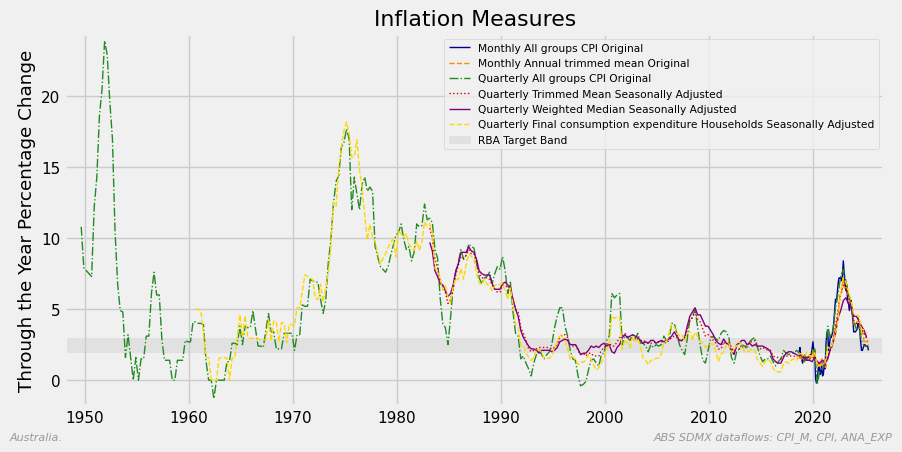

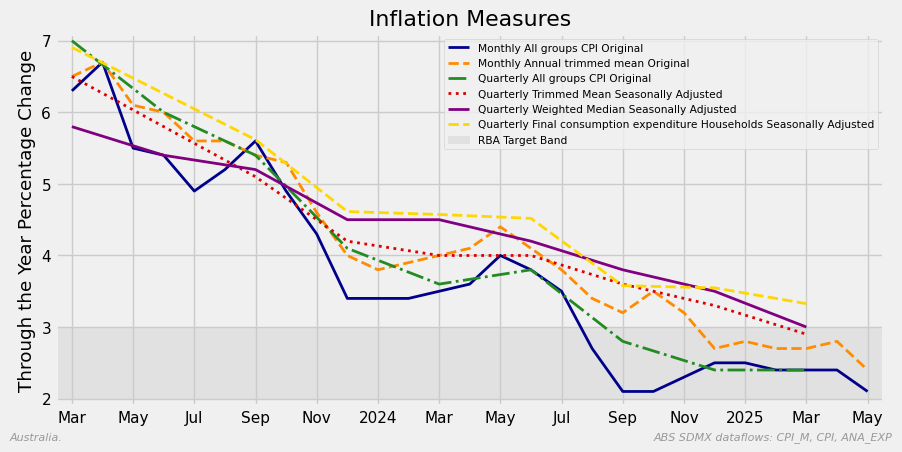

In [14]:
mg.multi_start(
    data,
    starts=(0, recent),
    function=mg.line_plot_finalise,
    title="Inflation Measures",
    ylabel="Through the Year Percentage Change",
    axhspan={"ymin": 2, "ymax": 3, "color": "lightgrey", "alpha": 0.5, "label": "RBA Target Band", "zorder": -1},
    legend={"loc": "best", "ncol": 1, "fontsize": "x-small"},
    #marker=list("<>^vosD"),
    #markersize=100,
    lfooter="Australia. ",
    rfooter=f"ABS SDMX dataflows: {', '.join(data_flows)}",
    show=SHOW,
)

## Finished

In [15]:
# watermark
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda

Last updated: 2025-07-07 21:20:20

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 24.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

pandas : 2.3.0
typing : 3.10.0.0
mgplot : 0.2.6
sdmxabs: 0.1.2

Watermark: 2.5.0



In [16]:
print("Finished")

Finished
